## Creating a Net-Zero Momentum Sector Strategy

We have already seen a Momentum Cross Over strategy in session two.

Now, instead, we will implement a Zero Momentum Basket. Our basket will only contain Equity (Stocks).

A basket here is simply a combination of individual stocks with different weightings

Remember to checkout the old notebooks if you've forgotten any methods from previous weeks:

https://imperialcollegelondon.app.box.com/s/rq3he3gb5mq2tlzzyhxh5q8s3iv82wfg

**1a)** Read in the [AAPL, META, GOOG, AMZN, MSFT, TSLA] Stock Adjusted Close Prices using Yahoo Finance from Start of 2017 - End of 2019 into a DataFrame (df) (1 Mark)

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#df = 
df = yf.download(['AAPL', 'META', 'GOOG', 'AMZN', 'MSFT', 'TSLA'], start = "2017-01-01", end = "2019-12-31")['Adj Close']

#Output head of df
df.head()

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/multitasking/__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/yfinance/multi.py", line 199, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/yfinance/multi.py", line 213, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/py

KeyboardInterrupt: 

**1b)** Plot the Adjusted Close Prices of these 6 stocks (1 Mark)

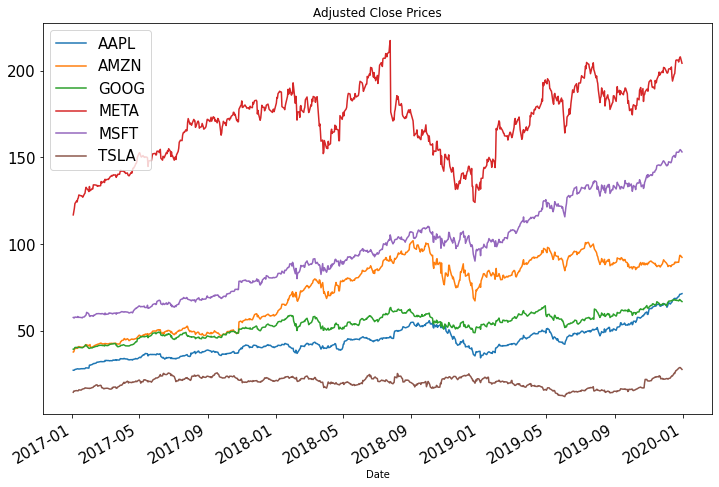

In [ ]:
#Plot
df.index = pd.to_datetime(df.index)

df.plot(figsize = (12,8), fontsize= 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.title('Adjusted Close Prices')
plt.show()

**1c)** Using the adjusted close of each of the 6 stocks generate the daily log return & show the new head of our df (1 Mark)

In [ ]:
#Output head of df
for com in df.columns:
  df['log return ' + com] = np.log(df[com]) - np.log(df[com].shift(1))

df.head()

,AAPL,AMZN,GOOG,META,MSFT,TSLA,log return AAPL,log return AMZN,log return GOOG,log return META,log return MSFT,log return TSLA
Date,,,,,,,,,,,,
2017-01-03,27.174753,37.683498,39.306999,116.860001,57.645370,14.466000,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,27.144337,37.859001,39.345001,118.690002,57.387455,15.132667,-0.001120,0.004646,0.000966,0.015538,-0.004484,0.045055
2017-01-05,27.282381,39.022499,39.701000,120.669998,57.387455,15.116667,0.005073,0.030270,0.009007,0.016544,0.000000,-0.001058
2017-01-06,27.586527,39.799500,40.307499,123.410004,57.884876,15.267333,0.011086,0.019716,0.015161,0.022453,0.008630,0.009918
2017-01-09,27.839205,39.846001,40.332500,124.900002,57.700638,15.418667,0.009118,0.001168,0.000620,0.012001,-0.003188,0.009863


## Creating a Basket

As you can see the stocks perform at varying levels across these 4 years. We will look at trying to create a basket which is "sector neutral" such that it is unaffected by the sectors overall performance.

(Although simpliefied) We can do this by shorting the sector as much as we long it.

For a basket of 6 stocks we will allocate weightings of:

A -> +30%

B -> +15%

C -> +5%

D -> -5%

E -> -15%

F -> -30%

This way we have a total capital allocation of 100% but we have gone long (+)50% and shorted (-)50%. Overall our net position in the sector is 0%.

We can consider the daily returns from an individual stock in the basket (Basket_X_return) by using the formula:

Basket_X_return = Weight(X) * daily_return

Consider Asset E with a +10% daily return:

Basket_E_return = -0.15 x 0.1 = -0.015 = -1.5% return

Here the daily return from asset E in the basket is -1.5%.


2a) Consider the basket:

A = AAPL

B = META

C = GOOG

D = AMZN

E = MSFT

F = TSLA

**2a)** For each Stock Return Column of our df, use the Basket_X_Return formula to create an array/list of daily returns for each stock. What is the total return of our basket? (1 Mark)

In [ ]:
#Print total return
Basket_AAPL_Return = 0.30 * df['log return AAPL']
Basket_META_Return = 0.15 * df['log return META']
Basket_GOOG_Return = 0.05 * df['log return GOOG']
Basket_AMZN_Return = -0.05 * df['log return AMZN']
Basket_MSFT_Return = -0.15 * df['log return MSFT']
Basket_TSLA_Return = -0.30 * df['log return TSLA']
print(sum(Basket_AAPL_Return[1:])+sum(Basket_META_Return[1:])+sum(Basket_GOOG_Return[1:])+sum(Basket_AMZN_Return[1:])+sum(Basket_MSFT_Return[1:])+sum(Basket_TSLA_Return[1:]))

0.014443488923543912


**2b)** Plot the Cumulative Return of our model vs the individual stocks (1 Mark)

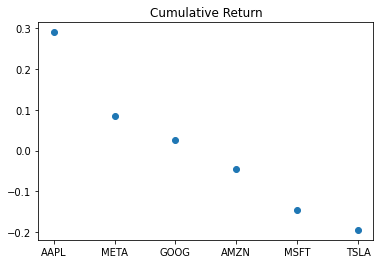

In [ ]:
#Output plot of Cumulative return
CumulativeReturn = [sum(Basket_AAPL_Return[1:]),sum(Basket_META_Return[1:]),sum(Basket_GOOG_Return[1:]),sum(Basket_AMZN_Return[1:]),sum(Basket_MSFT_Return[1:]),sum(Basket_TSLA_Return[1:])]
stocks = []
plt.scatter(['AAPL', 'META', 'GOOG', 'AMZN', 'MSFT', 'TSLA'], CumulativeReturn)
plt.title('Cumulative Return')
plt.show()

## Finding the Optimum Allocation

We have considered one possible combination our 6 stocks in the 6 slots (A-F)

**3a)** How many possible allocations are there for our 6 stocks in the 6 slots? (1 Mark)

In [ ]:
#Print number of allocations
import math
print(math.factorial(6))

720


Using combinations function for finding all variations.

Documentation: https://docs.python.org/3/library/itertools.html#itertools.combinations

**3b)** Generate all variations (1 Mark)

In [ ]:
from itertools import permutations
#Print List of all variations
variations = permutations(['AAPL', 'META', 'GOOG', 'AMZN', 'MSFT', 'TSLA'])

**3c)** Iterate through each possible basket & save the total basket return, which arrangement generates the optimum log return? (2 Marks)

In [ ]:
#Print Optimum Arrangement & it's return
baskets = [0.3, 0.15, 0.05, -0.05, -0.15, -0.3]
opt = math.inf
opt_arrangement = None

for arrangement in variations:

  total = 0
  
  for i in range(6):
    total = total + sum(baskets[i] * df['log return ' + arrangement[i]][1:])
  
  if abs(total) < opt:
    opt = total
    opt_arrangement = arrangement

print(opt_arrangement)
print(opt)

('AAPL', 'GOOG', 'TSLA', 'MSFT', 'META', 'AMZN')
0.00010661989693006024


## Improving Our Strategy

**4)** For the chance to get 11/10: Recommend another way we could try and optimise a zero momentum basket. No right answers!

i.e. iterate through different possible A-F weightings ([+25%, +15%, +10%...]). 

In [ ]:
#divide the weight more evenly
baskets = [(50 - (100/7) * i)/100 for i in range(1,7)]
# = [0.35714285714285715, 0.21428571428571427, 0.07142857142857138, -0.07142857142857145, -0.2142857142857143, -0.3571428571428572]
print(baskets)

opt = math.inf
opt_arrangement = None
print('a')
for arrangement in variations:
  print('b')
  total = 0
  
  for i in range(6):
    total = total + sum(baskets[i] * df['log return ' + arrangement[i]][1:])
  print(total)
  if abs(total) < opt:
    opt = total
    opt_arrangement = arrangement

print(opt_arrangement)
print(opt)

[0.35714285714285715, 0.21428571428571427, 0.07142857142857138, -0.07142857142857145, -0.2142857142857143, -0.3571428571428572]
a
None
inf
